Example 5.1 

In [1]:
from plot_utils import plot_blackjack_values, plot_policy
import matplotlib.pyplot as ply
%matplotlib inline
import numpy as np
import gym
env = gym.make('Blackjack-v0')

[2020-04-27 23:22:50,555] Making new env: Blackjack-v0
/home/harsh/anaconda3/envs/DEEPRL/lib/python3.5/site-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [2]:
print(env.observation_space)
print(env.action_space)

Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)


In [3]:
for i in range(5):
    state = env.reset()
    while True:
        print(state)
        action = env.action_space.sample()
        state, reward, done,info = env.step(action)
        if done:
            print('End game! Reward: ', reward)
            print('You won :)\n') if reward > 0 else print('You lost :(\n')
            break

(20, 8, False)
End game! Reward:  1.0
You won :)

(12, 7, False)
(16, 7, False)
(17, 7, False)
End game! Reward:  0.0
You lost :(

(18, 5, False)
End game! Reward:  -1
You lost :(

(13, 3, False)
(14, 3, False)
End game! Reward:  -1
You lost :(

(15, 5, False)
End game! Reward:  -1
You lost :(



According to the example policy is to stick if players sum is 20 or 21 else hit.

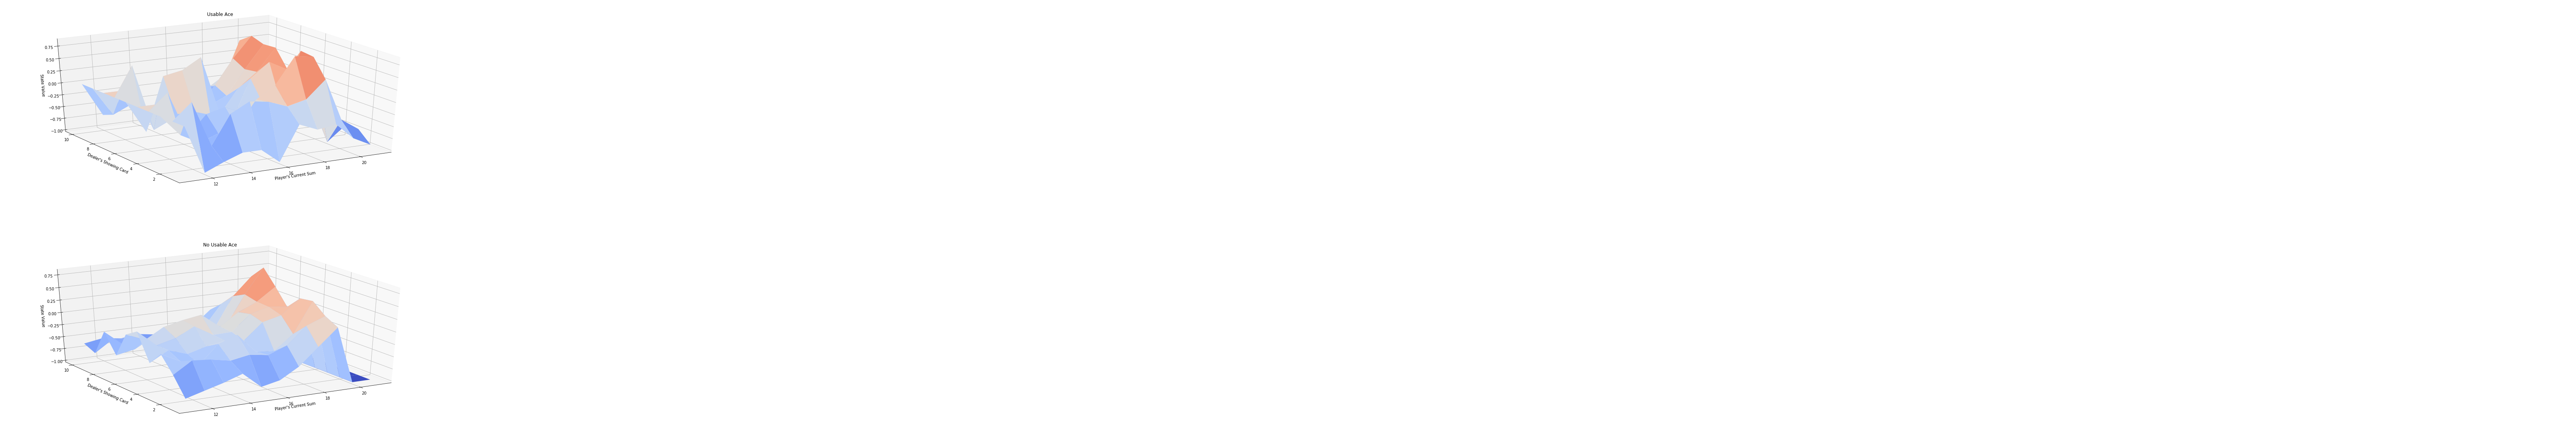

In [4]:
def strategy(observation):
    player_sum, dealer_sum, usable_ace = observation
    return 0 if player_sum<20 else 1
Returns = dict({})
for itr in range(10000):
    G=0
    episode = []
    state = env.reset()
    done = False
    while done is False:
        episode.append(state)
        action = strategy(state)
        episode.append(action)
        state, reward, done, info = env.step(action)
        episode.append(reward)
    #print(episode)
    for s in range(len(episode)-3,-1,-3):
        #print(episode[s])
        G += episode[s+2]
        if episode[s] in Returns:
            Returns[episode[s]].append(G)
        else:
            Returns[episode[s]] = [G]
for i in Returns.items():
    state = i[0]
    value = np.average(i[1])
    Returns[i[0]] = value
from plot_utils import plot_blackjack_values, plot_policy
plot_blackjack_values(Returns)

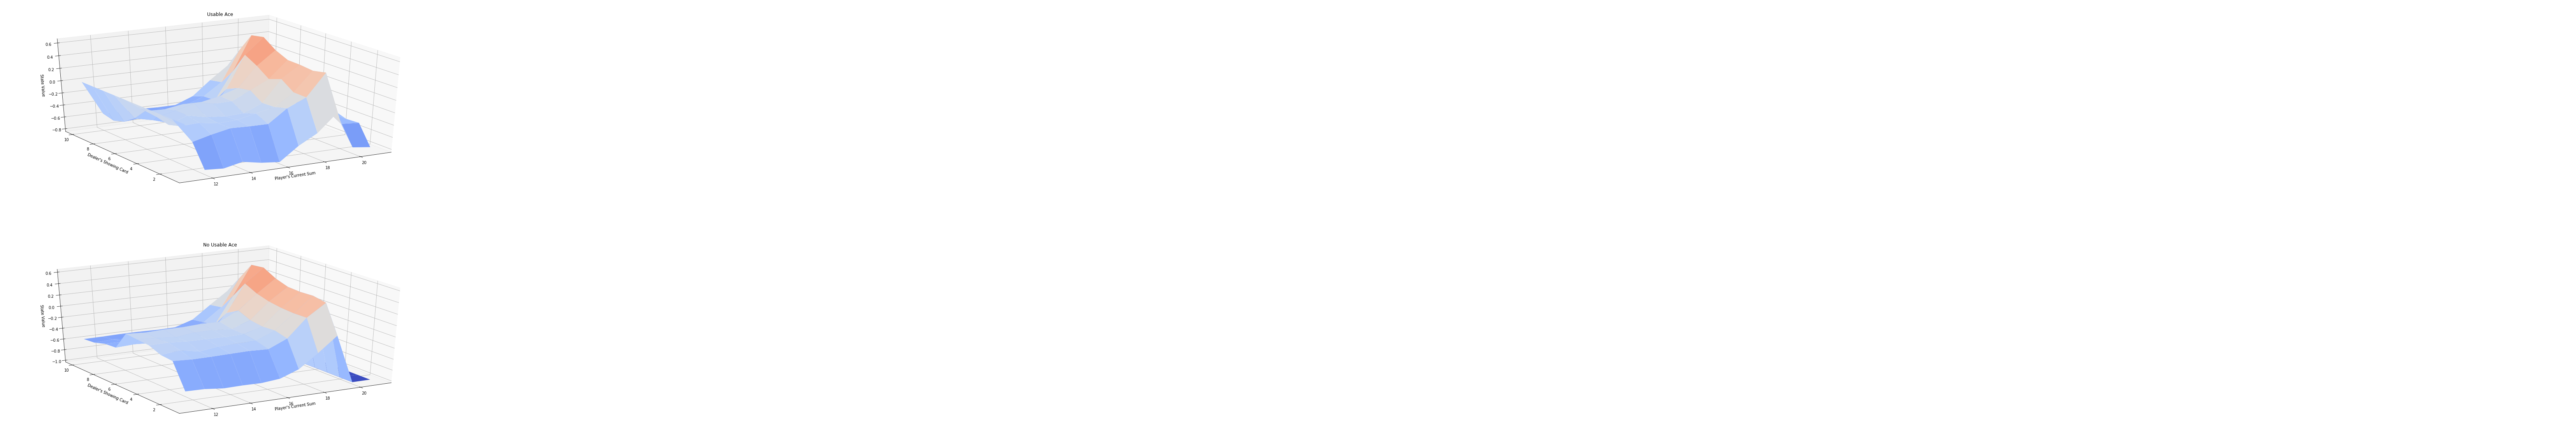

In [5]:
def strategy(observation):
    player_sum, dealer_sum, usable_ace = observation
    return 0 if player_sum<20 else 1
Returns = dict({})
for itr in range(500000):
    G=0
    episode = []
    state = env.reset()
    done = False
    while done is False:
        episode.append(state)
        action = strategy(state)
        episode.append(action)
        state, reward, done, info = env.step(action)
        episode.append(reward)
    #print(episode)
    for s in range(len(episode)-3,-1,-3):
        #print(episode[s])
        G += episode[s+2]
        if episode[s] in Returns:
            Returns[episode[s]].append(G)
        else:
            Returns[episode[s]] = [G]
for i in Returns.items():
    state = i[0]
    value = np.average(i[1])
    Returns[i[0]] = value
from plot_utils import plot_blackjack_values, plot_policy
plot_blackjack_values(Returns)